In [1]:
#Importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
#use GPU if available
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print( torch.cuda.device_count())
    print('Available:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

1
Available: Tesla T4


In [3]:
!pip install wget
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=fd4ca8f27669c5f95b7d4906fe3ace8ab380c3f9d448770c856eea7ae180b53c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.6 MB/s eta 0:00:00


In [4]:
#url for training and test datasets
url_train='https://groups.csail.mit.edu/sls/downloads/movie/engtrain.bio'
url_test='https://groups.csail.mit.edu/sls/downloads/movie/engtest.bio'

In [5]:
import wget
import os

In [6]:
#downloading the training dataset
wget.download(url_train)

'engtrain.bio'

In [7]:
#downaloading the test dataset
wget.download(url_test)

'engtest.bio'

In [8]:
import csv
# Lists to store sentences and their labels
sentences = []
labels = []
# Lists to temporarily store tokens and token labels for each sentence
tokens = []
token_labels = []
unique_labels = set()
# Open the input file
with open("./engtrain.bio", newline = '') as lines:                                                                                          
    # Create a CSV reader object
    line_reader = csv.reader(lines, delimiter='\t')
    print("lr",line_reader)
    
    for line in line_reader:
        # Check if the line is empty and append the tokens and token labels to the sentences and labels lists
        if line == []:

            sentences.append(tokens)
            labels.append(token_labels)           
    
            tokens = []
            token_labels = []        
        #extract the token and token label and add token label to unique_labels
        else: 

            tokens.append(line[1])
            token_labels.append(line[0])

            unique_labels.add(line[0])
print("sentences",sentences)
print("tokens",tokens)
print("labels",labels)
print("token_labels",token_labels)
print("unique_labels",unique_labels)

lr <_csv.reader object at 0x7f3a1674d230>
sentences [['what', 'movies', 'star', 'bruce', 'willis'], ['show', 'me', 'films', 'with', 'drew', 'barrymore', 'from', 'the', '1980s'], ['what', 'movies', 'starred', 'both', 'al', 'pacino', 'and', 'robert', 'deniro'], ['find', 'me', 'all', 'of', 'the', 'movies', 'that', 'starred', 'harold', 'ramis', 'and', 'bill', 'murray'], ['find', 'me', 'a', 'movie', 'with', 'a', 'quote', 'about', 'baseball', 'in', 'it'], ['what', 'movies', 'have', 'mississippi', 'in', 'the', 'title'], ['show', 'me', 'science', 'fiction', 'films', 'directed', 'by', 'steven', 'spielberg'], ['do', 'you', 'have', 'any', 'thrillers', 'directed', 'by', 'sofia', 'coppola'], ['what', 'leonard', 'cohen', 'songs', 'have', 'been', 'used', 'in', 'a', 'movie'], ['show', 'me', 'films', 'elvis', 'films', 'set', 'in', 'hawaii'], ['what', 'movie', 'is', 'references', 'zydrate'], ['are', 'there', 'any', 'musical', 'films', 'with', 'patrick', 'dempsey'], ['list', 'westerns', 'starring', 'john

In [9]:
[  print(' '.join(sentences[i])) for i in range(10)]

what movies star bruce willis
show me films with drew barrymore from the 1980s
what movies starred both al pacino and robert deniro
find me all of the movies that starred harold ramis and bill murray
find me a movie with a quote about baseball in it
what movies have mississippi in the title
show me science fiction films directed by steven spielberg
do you have any thrillers directed by sofia coppola
what leonard cohen songs have been used in a movie
show me films elvis films set in hawaii


[None, None, None, None, None, None, None, None, None, None]

In [10]:
' '.join(sentences[1])

'show me films with drew barrymore from the 1980s'

In [11]:
pd.DataFrame({"Word":sentences[2],"Labels":labels[2]})

,Word,Labels
0,what,O
1,movies,O
2,starred,O
3,both,O
4,al,B-ACTOR
5,pacino,I-ACTOR
6,and,O
7,robert,B-ACTOR
8,deniro,I-ACTOR


In [12]:
print("Number of training sentences: {:,}".format(len(sentences)))

Number of training sentences: 9,775


In [13]:
#load the auto tokenizer
from transformers import AutoTokenizer,AlbertForTokenClassification
import numpy as np
tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")

In [14]:
TokenLength=[len(tokenizer.encode(' '.join(i),add_special_tokens=True)) for i in sentences]

In [15]:
tokenizer.decode([101, 2265, 2033, 3152, 2007, 3881, 100, 2013, 1996, 3865, 102])

'likestar promoted nu pushed luke if path24 praly'

In [16]:
#print the minimum token length
print('Minimum  length: {:,} tokens'.format(min(TokenLength)))
#print the maximum length token
print('Maximum length: {:,} tokens'.format(max(TokenLength)))
#print the median length token
print('Median length: {:,} tokens'.format(int(np.median(TokenLength))))

Minimum  length: 3 tokens
Maximum length: 55 tokens
Median length: 12 tokens


<ipython-input-17-4b39a5f15c7a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TokenLength, kde=False, rug=False,color='plum')


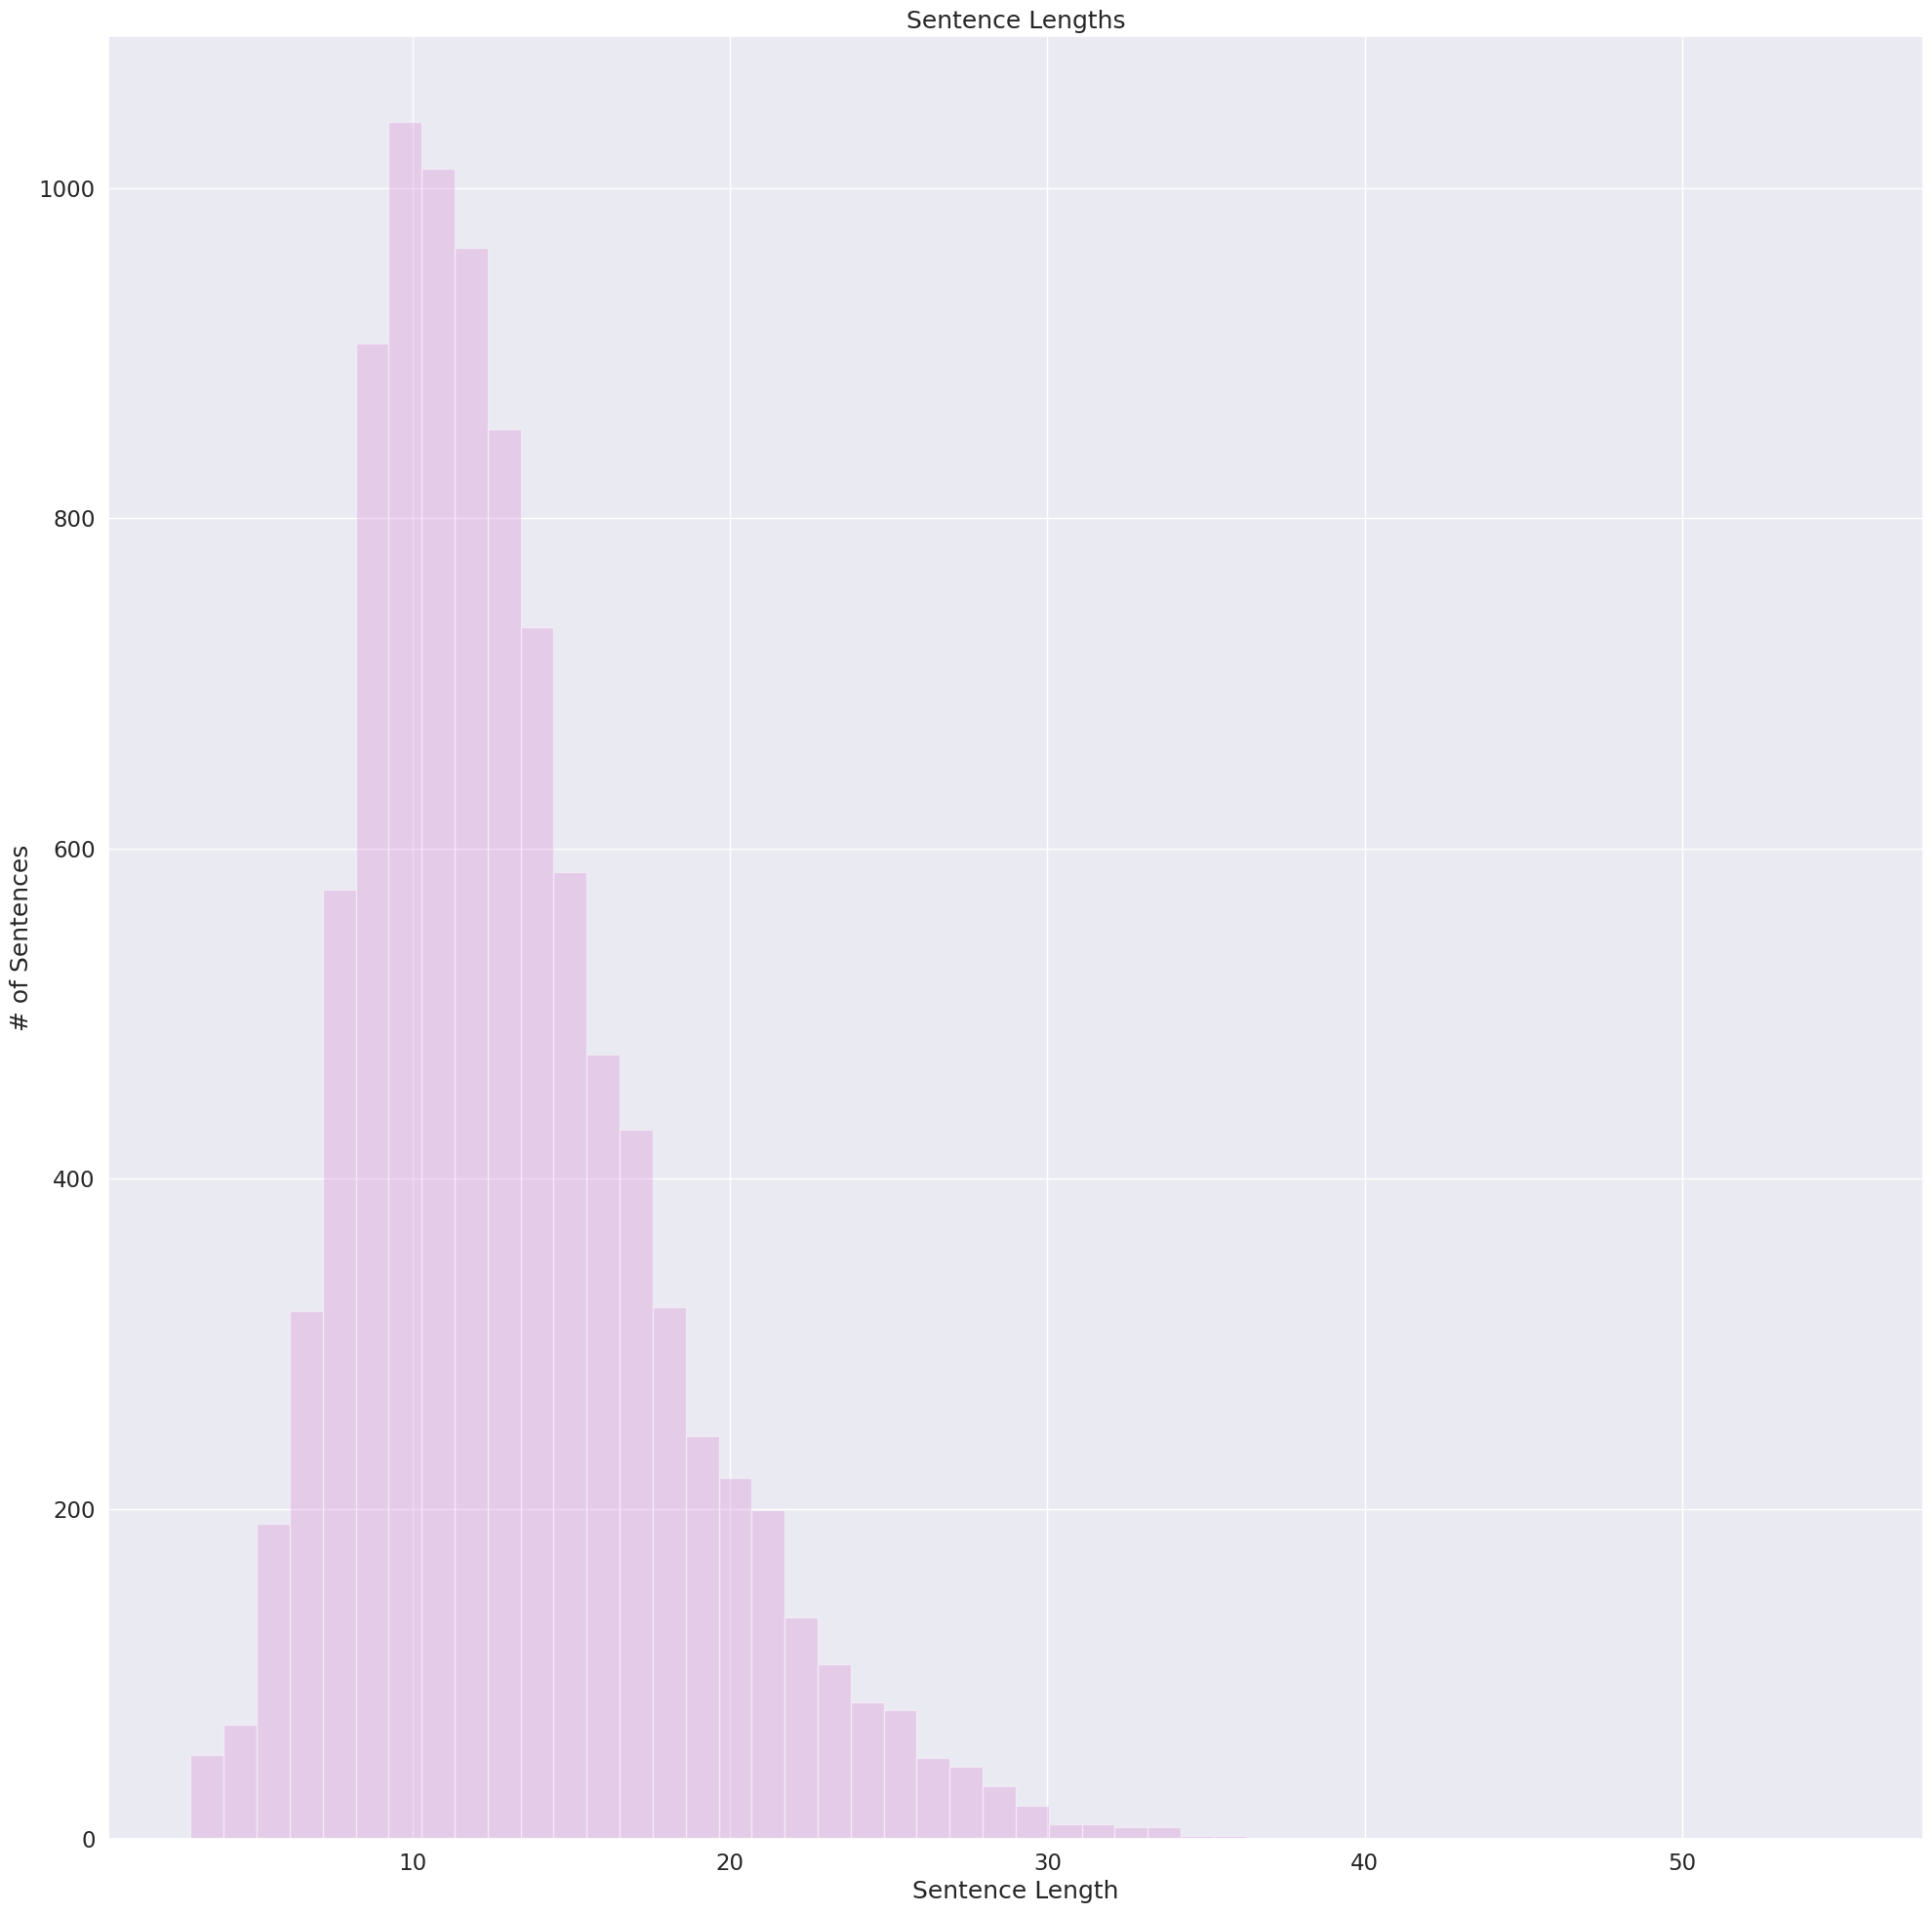

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.figure(figsize=(24,24))
plt.rcParams["figure.figsize"] = (10,5)

# Plot the distribution of comment lengths.
sns.distplot(TokenLength, kde=False, rug=False,color='plum')

plt.title('Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentences');

In [18]:
#Sample Sentence
SampleSentence=tokenizer.encode_plus(' '.join(sentences[1]), add_special_tokens = True,truncation = True,max_length = 50,padding = True,return_attention_mask = True, return_tensors = 'pt')
SampleSentence

{'input_ids': tensor([[   2,  298,   55, 1491,   29, 2115, 5150, 1995,   37,   14, 1043,   18,
            3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [19]:
##input_ids
print("\nInput Ids:",SampleSentence["input_ids"])
##attention_mask
print("\nAttention Mask:",SampleSentence["attention_mask"])


Input Ids: tensor([[   2,  298,   55, 1491,   29, 2115, 5150, 1995,   37,   14, 1043,   18,
            3]])

Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [20]:
label_map = {}
#assign integer to the unique labels
for (i, label) in enumerate(unique_labels):
    
    # Map it to its integer
    label_map[label] = i

In [21]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

input_ids = []
attention_masks = []

for sent in sentences:
    # Convert the sentence tokens into a string
    sent_str = ' '.join(sent)
    # Encode the sentence using the tokenizer
    encoded_dict = tokenizer.encode_plus(
                        sent_str,                 
                        add_special_tokens = True,
                        truncation = True,
                        max_length = 55,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
    
    # Append the encoded input IDs to the list      
    input_ids.append(encoded_dict['input_ids'][0])
    
    # And its attention mask
    attention_masks.append(encoded_dict['attention_mask'][0])

print('Original: ', sentences[24])
print('Token IDs:', input_ids[24])
print('Masks:', attention_masks[24])

Original:  ['find', 'the', 'movies', 'action', 'movies', 'directed', 'by', 'john', 'woo', 'from', 'the', '1990s']
Token IDs: tensor([    2,   477,    14,  4795,  1028,  4795,  1012,    34,   239, 10761,
           37,    14,   961,    18,     3,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0])
Masks: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0])


In [22]:
new_labels = []

# The special label ID we'll give to "extra" tokens.
null_label_id = -100

# Iterating over each input ID and its corresponding original labels
for (sen, orig_labels) in zip(input_ids, labels):
    
    padded_labels = []

    orig_labels_i = 0 
    # Iterating over each token ID in the input ID
    for token_id in sen:

        token_id = token_id.numpy().item()
        # Check if the token is a padding, [CLS], or [SEP] token
        if (token_id == tokenizer.pad_token_id) or \
            (token_id == tokenizer.cls_token_id) or \
            (token_id == tokenizer.sep_token_id):
            # Appending the null_label_id for padding, [CLS], or [SEP] tokens
            padded_labels.append(null_label_id)
         # Checking if the token is a subword token
        elif tokenizer.convert_ids_to_tokens(token_id)[0:2] == '##':
            padded_labels.append(null_label_id)

        else:
            
            label_str = orig_labels[orig_labels_i]

            padded_labels.append(label_map[label_str])

    orig_labels_i += 1

    assert(len(sen) == len(padded_labels))    
    # Appending the padded labels to the new_labels list
    new_labels.append(padded_labels)

In [23]:
print('\nSentence:    ', sentences[2])
print('\nLabels:      ', labels[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(sentences[2])))
print('\nToken IDs:   ', input_ids[2])
print('\nNew Labels:  ', new_labels[2])
print('\nMask:        ', attention_masks[2])


Sentence:     ['what', 'movies', 'starred', 'both', 'al', 'pacino', 'and', 'robert', 'deniro']

Labels:       ['O', 'O', 'O', 'O', 'B-ACTOR', 'I-ACTOR', 'O', 'B-ACTOR', 'I-ACTOR']

BERT Tokens:  ['▁what', '▁movies', '▁starred', '▁both', '▁al', '▁pac', 'ino', '▁and', '▁robert', '▁den', 'iro']

Token IDs:    tensor([   2,   98, 4795, 5068,  156,  493, 9049, 3252,   17,  822, 5394, 8412,
           3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0])

New Labels:   [-100, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100]

Mask: 

In [24]:
# Concatenates a sequence of tensors along a new dimension
# [7,660  x  50].
pt_input_ids = torch.stack(input_ids, dim=0)

pt_attention_masks = torch.stack(attention_masks, dim=0)

pt_labels = torch.tensor(new_labels, dtype=torch.long)

In [25]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(pt_input_ids, pt_attention_masks, pt_labels)

# Create a 90-10 train-validation split.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

8,797 training samples
  978 validation samples


In [26]:
#creating a train data loader and validation dataloader
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


batch_size = 32

train_dataloader = DataLoader(train_dataset, sampler = RandomSampler(train_dataset), batch_size = batch_size )

validation_dataloader = DataLoader(val_dataset, sampler = SequentialSampler(val_dataset), batch_size = batch_size   )

In [27]:
#loading the pre-trained ALBERT model for token classification
from transformers import AlbertForTokenClassification, AdamW,AlbertConfig



model = AlbertForTokenClassification.from_pretrained("albert-base-v2",num_labels = len(label_map) + 1, output_attentions = False, output_hidden_states = False)

model.cuda()

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForTokenClassification: ['predictions.decoder.weight', 'predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.dense.weight', 'predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.bias']
- This IS expected if you are initializing AlbertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForTokenClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably

AlbertForTokenClassification(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bi

In [28]:
# Load the AdamW optimizer
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate 
                  eps = 1e-8 # args.adam_epsilon 
                )

In [29]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs 
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [30]:
import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []
#training for 4 epochs
for epoch_i in range(0, epochs):

    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    
    total_loss = 0

    model.train()
    
    for step, batch in enumerate(train_dataloader):
        
        if step % 40 == 0 and not step == 0:
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        
        

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        
        
        loss = outputs[0]

        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)            
    loss_values.append(avg_train_loss)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    275.
  Batch    80  of    275.
  Batch   120  of    275.
  Batch   160  of    275.
  Batch   200  of    275.
  Batch   240  of    275.
  Average training loss: 0.17
======== Epoch 2 / 4 ========
Training...
  Batch    40  of    275.
  Batch    80  of    275.
  Batch   120  of    275.
  Batch   160  of    275.
  Batch   200  of    275.
  Batch   240  of    275.
  Average training loss: 0.13
======== Epoch 3 / 4 ========
Training...
  Batch    40  of    275.
  Batch    80  of    275.
  Batch   120  of    275.
  Batch   160  of    275.
  Batch   200  of    275.
  Batch   240  of    275.
  Average training loss: 0.08
======== Epoch 4 / 4 ========
Training...
  Batch    40  of    275.
  Batch    80  of    275.
  Batch   120  of    275.
  Batch   160  of    275.
  Batch   200  of    275.
  Batch   240  of    275.
  Average training loss: 0.07


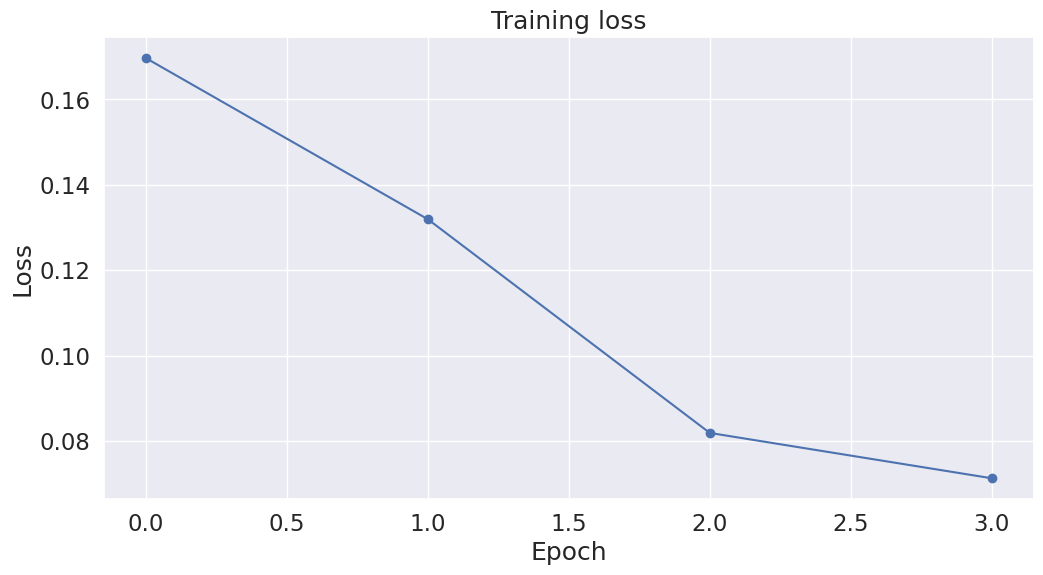

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [32]:
import csv

# List of all sentences in the dataset.
sentences = []
labels = []

# Lists to store the current sentence.
tokens = []
token_labels = []
unique_labels = set()

with open("./engtest.bio", newline = '') as lines:                                                                                          
    
    line_reader = csv.reader(lines, delimiter='\t')
    
    for line in line_reader:
        
        if line == []:

            sentences.append(tokens)
            labels.append(token_labels)           
    
            tokens = []
            token_labels = []        

        else: 

            tokens.append(line[1])
            token_labels.append(line[0])
            unique_labels.add(line[0])

In [33]:
input_ids = []
attention_masks = []

for sent in sentences:

    sent_str = ' '.join(sent)

    encoded_dict = tokenizer.encode_plus(sent_str,add_special_tokens = True, max_length = 50,pad_to_max_length = True, return_attention_mask = True, return_tensors = 'pt')
       
    input_ids.append(encoded_dict['input_ids'][0])
    
    attention_masks.append(encoded_dict['attention_mask'][0])

print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])
print('Masks:', attention_masks[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  ['are', 'there', 'any', 'good', 'romantic', 'comedies', 'out', 'right', 'now']
Token IDs: tensor([    2,    50,    80,   186,   254,  4478, 25271,    70,   193,   130,
            3,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
Masks: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


In [34]:
new_labels = []

null_label_id = -100

for (sen, orig_labels) in zip(input_ids, labels):
    
    padded_labels = []

    orig_labels_i = 0 

    for token_id in sen:
        
        token_id = token_id.numpy().item()

        if (token_id == tokenizer.pad_token_id) or \
            (token_id == tokenizer.cls_token_id) or \
            (token_id == tokenizer.sep_token_id):
            
            padded_labels.append(null_label_id)

        elif tokenizer.convert_ids_to_tokens(token_id)[0:2] == '##':

            padded_labels.append(null_label_id)

        else:
            

            label_str = orig_labels[orig_labels_i]

            padded_labels.append(label_map[label_str])

    orig_labels_i += 1

    assert(len(sen) == len(padded_labels))    

    new_labels.append(padded_labels)

In [35]:
print('\nSentence:    ', sentences[2])
print('\nLabels:      ', labels[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(sentences[2])))
print('\nToken IDs:   ', input_ids[2])
print('\nMask:        ', attention_masks[2])
print('\nNew Labels:  ', new_labels[2])


Sentence:     ['list', 'the', 'five', 'star', 'rated', 'movies', 'starring', 'mel', 'gibson']

Labels:       ['O', 'O', 'B-RATINGS_AVERAGE', 'I-RATINGS_AVERAGE', 'O', 'O', 'O', 'B-ACTOR', 'I-ACTOR']

BERT Tokens:  ['▁list', '▁the', '▁five', '▁star', '▁rated', '▁movies', '▁starring', '▁mel', '▁gibson']

Token IDs:    tensor([   2,  968,   14,  355,  778, 7675, 4795, 3154, 4551, 9467,    3,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0])

Mask:         tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

New Labels:   [-100, 3, 3, 3, 3, 3, 3, 3, 3, 3, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,

In [36]:
pt_input_ids = torch.stack(input_ids, dim=0)

pt_attention_masks = torch.stack(attention_masks, dim=0)

pt_labels = torch.tensor(new_labels, dtype=torch.long)

In [37]:
batch_size = 32  

prediction_data = TensorDataset(pt_input_ids, pt_attention_masks, pt_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [38]:
print('Predicting labels for {:,} test sentences...'.format(len(pt_input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 

  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 2,443 test sentences...
    DONE.


In [39]:
from sklearn.metrics import f1_score

# First, combine the results across the batches.
all_predictions = np.concatenate(predictions, axis=0)
all_true_labels = np.concatenate(true_labels, axis=0)

print("After flattening the batches, the predictions have shape:")
print("    ", all_predictions.shape)

# Next, let's remove the third dimension (axis 2), which has the scores
# for all 18 labels. 

# For each token, pick the label with the highest score.
predicted_label_ids = np.argmax(all_predictions, axis=2)

print("\nAfter choosing the highest scoring label for each token:")
print("    ", predicted_label_ids.shape) 


# Eliminate axis 0, which corresponds to the sentences.
predicted_label_ids = np.concatenate(predicted_label_ids, axis=0)
all_true_labels = np.concatenate(all_true_labels, axis=0)

print("\nAfter flattening the sentences, we have predictions:")
print("    ", predicted_label_ids.shape)
print("and ground truth:")
print("    ", all_true_labels.shape)

After flattening the batches, the predictions have shape:
     (2443, 50, 26)

After choosing the highest scoring label for each token:
     (2443, 50)

After flattening the sentences, we have predictions:
     (122150,)
and ground truth:
     (122150,)


In [40]:
# Construct new lists of predictions which don't include any null tokens.
real_token_predictions = []
real_token_labels = []

# For each of the input tokens in the dataset...
for i in range(len(all_true_labels)):

    # If it's not a token with a null label...
    if not all_true_labels[i] == -100:
        
        # Add the prediction and the ground truth to their lists.
        real_token_predictions.append(predicted_label_ids[i])
        real_token_labels.append(all_true_labels[i])

print("Before filtering out `null` tokens, length = {:,}".format(len(all_true_labels)))
print(" After filtering out `null` tokens, length = {:,}".format(len(real_token_labels)))

Before filtering out `null` tokens, length = 122,150
 After filtering out `null` tokens, length = 27,018


In [41]:
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt


f1 = f1_score(real_token_labels, real_token_predictions, average='micro') 


print ("F1 score: {:.2%}".format(f1))



F1 score: 98.63%
